## 1. Descripción del caso

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)

datos = pd.read_csv("/content/drive/MyDrive/Proyecto_Cielo_PA/FUTURA/HRAnalytics.csv", sep=",", decimal=".")

In [ ]:
# Lectura de datos
#datos = pd.read_csv("HRAnalytics.csv", sep=",", decimal=".")

# Inspeccionando la estructura de los datos
info_data = {
    'Columnas': datos.columns,
    'Tipo de Dato': datos.dtypes,
    'Valores Nulos': datos.isnull().sum(),
    'Valores No Nulos': datos.notnull().sum()
}

# Creando el DataFrame
estructura_datos = pd.DataFrame(info_data)

# Aplicando estilo para la visualización
estructura_datos.style.set_caption("Estructura de Datos del Archivo 'HRAnalytics.csv'") \
                      .set_properties(**{'text-align': 'center'}) \
                      .set_table_styles([{
                          'selector': 'th',
                          'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                                    ('background-color', '#4CAF50')]
                      }, {
                          'selector': 'td',
                          'props': [('font-size', '12px')]
                      }])

,Columnas,Tipo de Dato,Valores Nulos,Valores No Nulos
employee_id,employee_id,int64,0,54808
department,department,object,0,54808
region,region,object,0,54808
education,education,object,2409,52399
gender,gender,object,0,54808
recruitment_channel,recruitment_channel,object,0,54808
no_of_trainings,no_of_trainings,int64,0,54808
age,age,int64,0,54808
previous_year_rating,previous_year_rating,float64,4124,50684
length_of_service,length_of_service,int64,0,54808


In [ ]:
# Vista general de los primeros 10 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 10)       # Muestra hasta 10 filas
print("\nPrimeros 10 elementos de los datos:")
datos.head(10)


Primeros 10 elementos de los datos:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [ ]:
# Detectando los valores duplicados con ayuda de en la columna 'employee_id'
unique_ids = datos['employee_id'].nunique()
print(f'Número de IDs únicos: {unique_ids}')

Número de IDs únicos: 54808


In [ ]:
# Eliminamos la variable 'employee_id' ya que no es de interés
datos.drop('employee_id', axis=1, inplace=True)

In [ ]:
# Convertimos la variable target a tipo categoría
datos['is_promoted'] = datos['is_promoted'].astype('category')

In [ ]:
# Revisamos el orden de las observaciones negativas y positivas
print(datos['is_promoted'].cat.categories)

Index([0, 1], dtype='int64')


In [ ]:
# Renombramos las categorías del target
datos['is_promoted'] = datos['is_promoted'].cat.rename_categories(['NO_PROMOVIDO', 'PROMOVIDO'])

In [ ]:
# Evaluando la variable target 'is_promoted'

# Calculando las frecuencias y porcentajes
conteo = datos['is_promoted'].value_counts()
porcentaje = datos['is_promoted'].value_counts(normalize=True) * 100

# Creando un DataFrame para mostrar ambos resultados en un cuadro
resultado = pd.DataFrame({'Frecuencia': conteo, 'Porcentaje (%)': porcentaje})

# Aplicando formato para la visualización
resultado.style.format({'Porcentaje (%)': '{:.2f}%'}) \
               .set_caption("Distribución de la Variable Target 'is_promoted'") \
               .set_properties(**{'text-align': 'center'}) \
               .set_table_styles([{
                   'selector': 'th',
                   'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                             ('background-color', '#4CAF50')]
               }, {
                   'selector': 'td',
                   'props': [('font-size', '12px')]
               }])

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,50140,91.48%
PROMOVIDO,4668,8.52%


- El porcentaje de nuestra variable target nos indica que debemos hacer un balanceo previo ya que supera el 9:1 con 91.48% para los no promovidos y un 8.52% para los promovidos. Tambien podemos ver que nuestro éxito será encontrar los "PROMOVIDO"

## 2. Detección de datos perdidos o valores faltantes

In [ ]:
pip install missingno

<Axes: >

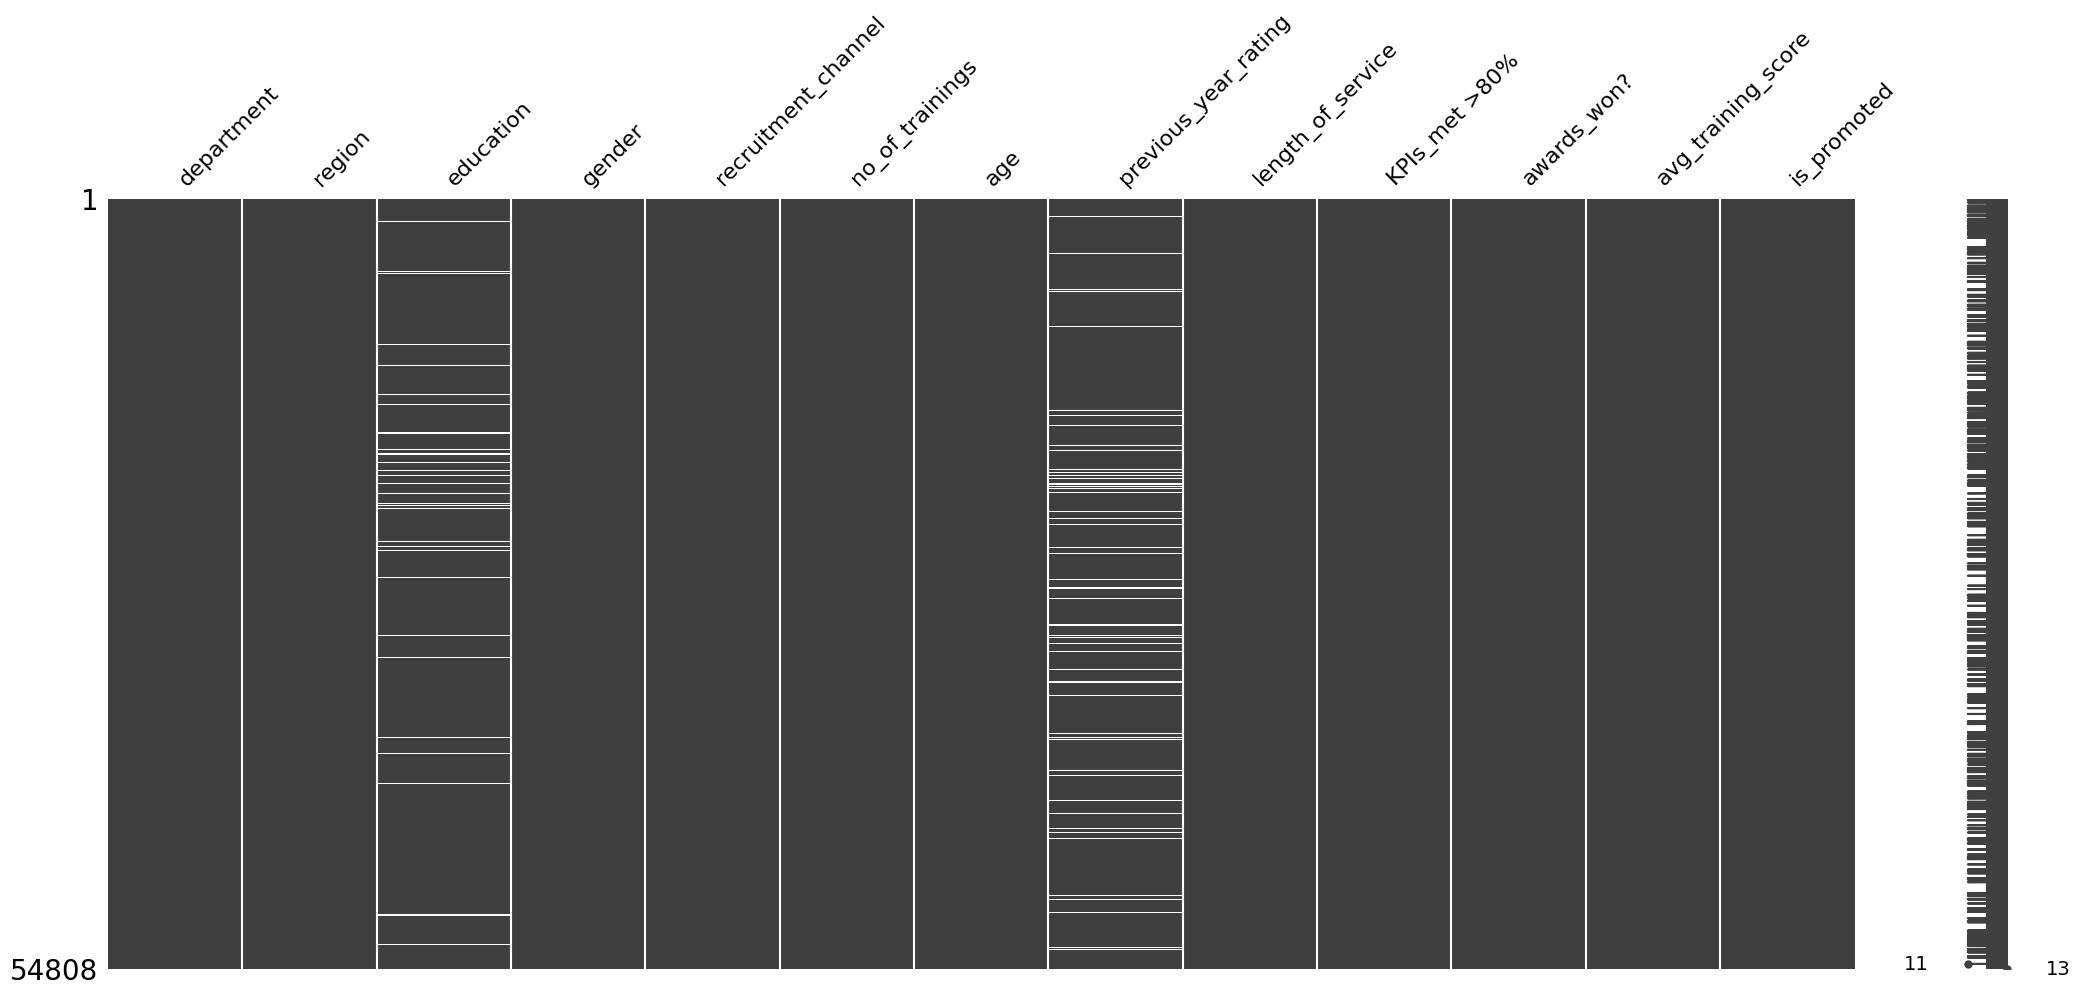

In [ ]:
import missingno as msno

# Visualización de datos perdidos
msno.matrix(datos)

In [ ]:
# Número de registros con datos perdidos por variable
pd.set_option('display.max_rows', None) # Muestra todas las columnas
pd.set_option('display.max_rows', None) # Muestra todas las filas
datos.isnull().sum()

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
KPIs_met >80%,0


## 3. Preprocesamiento de datos

### Analizando la naturaleza de las variables "previous_year_rating" y "education" antes de ser imputadas

In [ ]:
# Conteo de valores en la columna 'education'
education_counts = datos['education'].value_counts(dropna=False)

# Creando un DataFrame
education_df = pd.DataFrame({'Frecuencia': education_counts})

# Aplicando estilo para la visualización
education_df.style.set_caption("Distribución de la Variable 'education'") \
                  .set_properties(**{'text-align': 'center'}) \
                  .set_table_styles([{
                      'selector': 'th',
                      'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                                ('background-color', '#4CAF50')]
                  }, {
                      'selector': 'td',
                      'props': [('font-size', '12px')]
                  }])

,Frecuencia
education,
Bachelor's,36669
Master's & above,14925
nan,2409
Below Secondary,805


- Viendo la naturaleza de la variable no podemos hacer uso de alguna imputación ya que el NaN es por falta de educación no por un valor sin completar, entonces el NaN la consideraremos como otro categoría.

In [ ]:
# Conteo de valores en la columna 'previous_year_rating'
rating_counts = datos['previous_year_rating'].value_counts(dropna=False)

# Creando un DataFrame
rating_df = pd.DataFrame({'Frecuencia': rating_counts})

# Aplicando estilo para la visualización
rating_df.style.set_caption("Distribución de la Variable 'previous_year_rating'") \
               .set_properties(**{'text-align': 'center'}) \
               .set_table_styles([{
                   'selector': 'th',
                   'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                             ('background-color', '#4CAF50')]
               }, {
                   'selector': 'td',
                   'props': [('font-size', '12px')]
               }])

,Frecuencia
previous_year_rating,
3.000000,18618
5.000000,11741
4.000000,9877
1.000000,6223
2.000000,4225
nan,4124


- Al analizar esta variable notamos que esos NaN provienen de colaboradores que tienen solo un año trabajando en la empresa, lo que los excluye de tener un rating, no podemos hacer una imputación numérica, pero lo que si podemos hacer es crear una nueva categoría.

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


<Axes: >

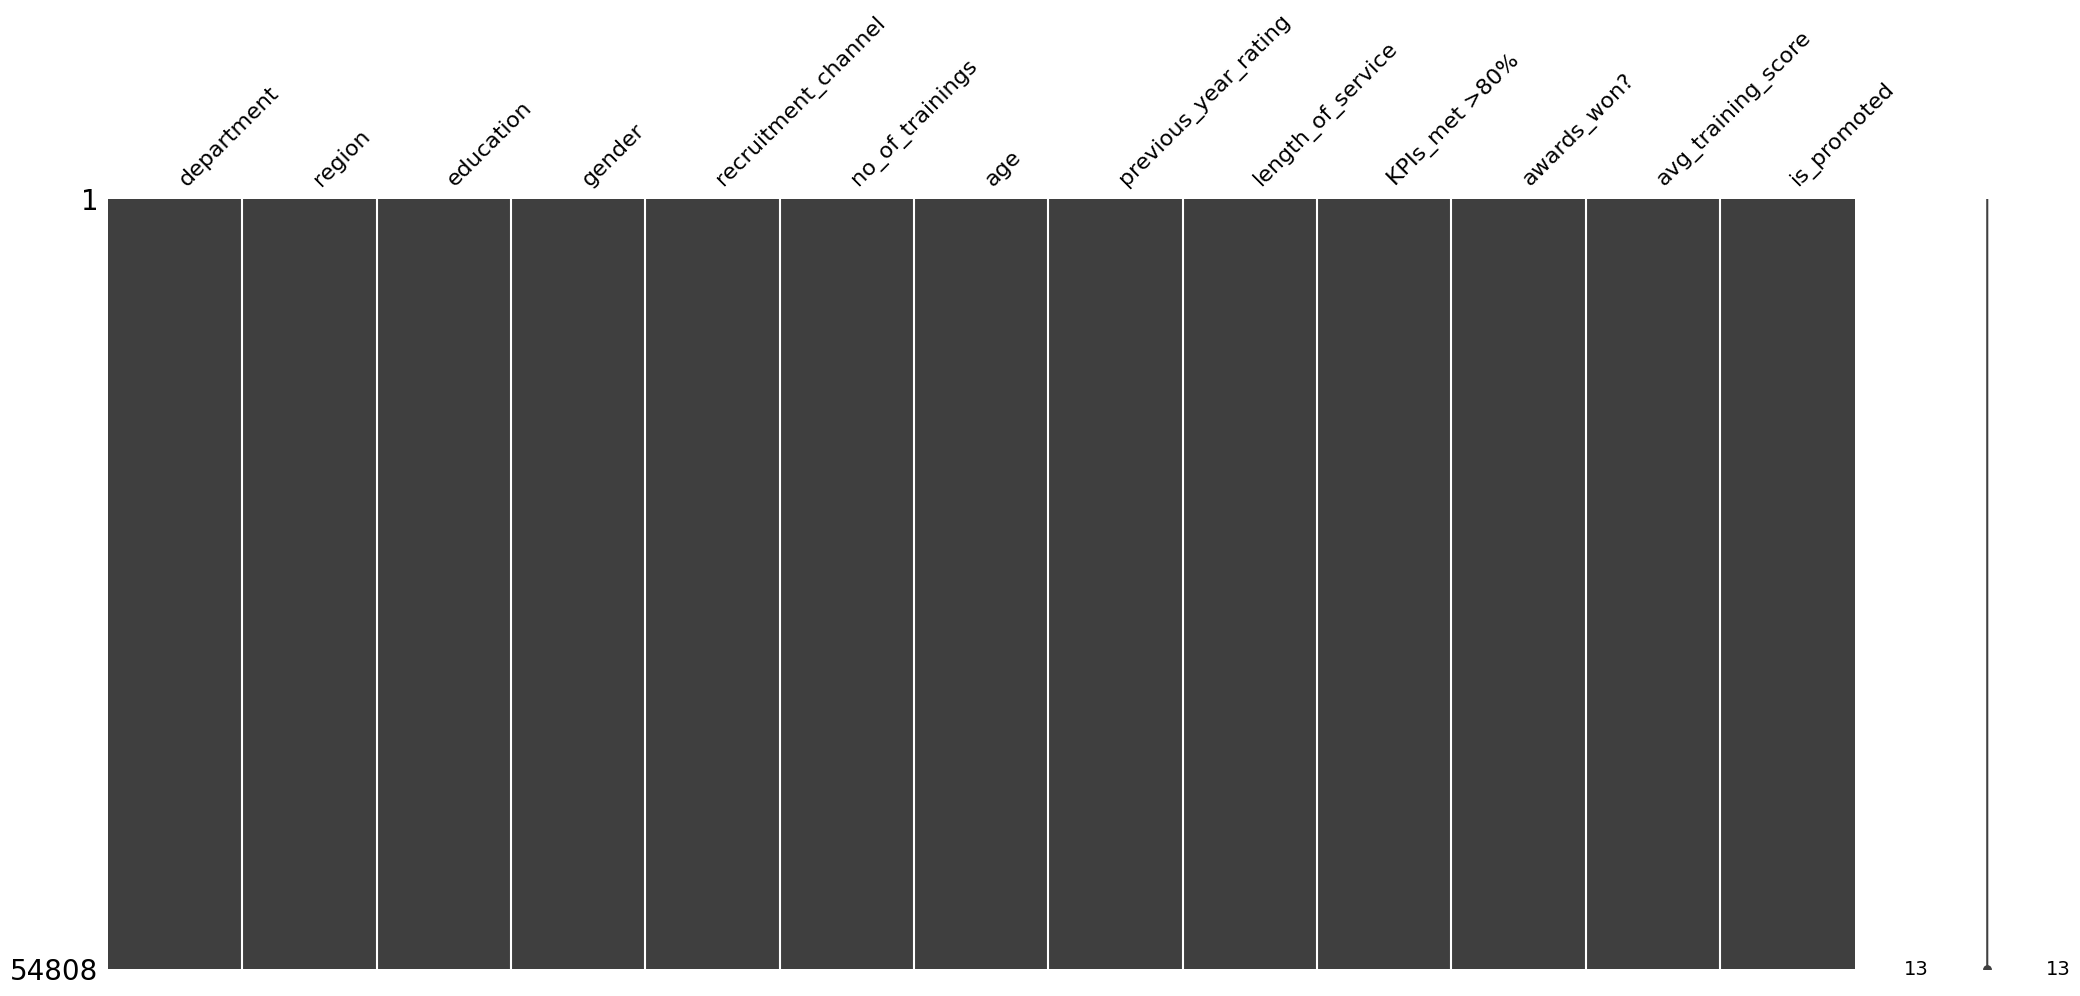

In [ ]:
# Creamos una copia del data set donde tendremos la base de datos imputada
datos_transformado = datos.copy()

# Reemplazamos los "NaN" de la variable education por la categoría "Sin_información"
datos_transformado['education'] = datos_transformado['education'].fillna('Sin_información')

# Reemplazamos los "NaN" de la variable previous_year_rating por la categoría "0"
datos_transformado['previous_year_rating']  = datos_transformado['previous_year_rating'].fillna('0')

print(datos_transformado.isnull().sum())

msno.matrix(datos_transformado)

In [ ]:
# Vista general de los primeros 4 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Primeros 4 elementos de los datos:


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,NO_PROMOVIDO
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,NO_PROMOVIDO
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,NO_PROMOVIDO
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,NO_PROMOVIDO


### Identificando variables con varianza cero o casi cero

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Inicializamos el selector para identificar variables con varianza baja
selector = VarianceThreshold(threshold=0.01)
selector.fit(datos_transformado.select_dtypes(include=[np.number]))

# Identificamos las columnas que se eliminarán
low_variance_features = [column for column, keep in zip(datos_transformado.select_dtypes(include=[np.number]).columns, selector.get_support()) if not keep]
print("Variables con baja varianza:", low_variance_features)

# Eliminamos las columnas de baja varianza identificadas
datos_transformado.drop(columns=low_variance_features, inplace=True)

Variables con baja varianza: []


- No se identifico ninguna variable con baja varianza como para eliminarse, asi que continuamos.

### Normalización de las variables numéricas.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas numéricas para normalizarlas
numerical_columns = ['no_of_trainings','age','previous_year_rating','length_of_service', 'KPIs_met >80%',
                     'awards_won?','avg_training_score']

# Inicializamos el escalador Min-Max
scaler = MinMaxScaler()

# Aplicamos la normalización
datos_transformado[numerical_columns] = scaler.fit_transform(datos_transformado[numerical_columns])

# Verificamos el resumen de las variables normalizadas
datos_transformado[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,0.028112,0.067696,0.0,0.000,0.000,0.000000,1.0
age,54808.0,0.370098,0.191504,0.0,0.225,0.325,0.475000,1.0
...,...,...,...,...,...,...,...,...
awards_won?,54808.0,0.023172,0.150450,0.0,0.000,0.000,0.000000,1.0
avg_training_score,54808.0,0.406446,0.222859,0.0,0.200,0.350,0.616667,1.0


- Para normalizar variables usualmente se seleccionan variables numéricas continuas, pero en este caso normalizaremos todas para mejorar la interpretación.

In [ ]:
datos_transformado_catboost = datos_transformado.copy()

### Creando variables dummies

In [ ]:
# Como análizamos esta variable además de tener muchas categorías no tenia impacto en el target, es decir no lo discrimina. Por lo tanto
# no la usaré para dummizar.
datos_transformado['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [ ]:
# Creación de variables dummies para las variables categóricas seleccionadas
datos_transformado = pd.get_dummies(datos_transformado.drop(columns={'region'}), columns=['department', 'education',
                                                                 'gender', 'recruitment_channel'],
                                    drop_first=True)

# Verificamos la estructura después de crear las dummies
datos_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   no_of_trainings               54808 non-null  float64 
 1   age                           54808 non-null  float64 
 2   previous_year_rating          54808 non-null  float64 
 3   length_of_service             54808 non-null  float64 
 4   KPIs_met >80%                 54808 non-null  float64 
 5   awards_won?                   54808 non-null  float64 
 6   avg_training_score            54808 non-null  float64 
 7   is_promoted                   54808 non-null  category
 8   department_Finance            54808 non-null  bool    
 9   department_HR                 54808 non-null  bool    
 10  department_Legal              54808 non-null  bool    
 11  department_Operations         54808 non-null  bool    
 12  department_Procurement        54808 non-null  

In [ ]:
# Vista general de los primeros 4 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Primeros 4 elementos de los datos:


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_Sin_información,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,True,False,False,False,True
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,NO_PROMOVIDO,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,True
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,False


### Identificando predictores correlacionados

In [ ]:
import pandas as pd
import numpy as np

# Calculamos la matriz de correlación para las columnas de interés
descr_cor = datos_transformado.iloc[:, :7].corr()

# Extraemos la parte superior de la matriz de correlación (similar a 'upper.tri' en R)
upper_tri = descr_cor.where(np.triu(np.ones(descr_cor.shape), k=1).astype(bool))

# Resumen de los valores de correlación
correlation_values = upper_tri.stack()
print("Resumen de los valores de correlación:")
print(correlation_values.describe())

Resumen de los valores de correlación:
count    21.000000
mean      0.056061
           ...    
75%       0.078391
max       0.657111
Length: 8, dtype: float64


In [ ]:
# Encontrando las columnas con alta correlación (similar a 'findCorrelation' en R)
threshold = 0.40
high_corr = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]

# Mostramos las variables con alta correlación
print("\nVariables con alta correlación:")
print(high_corr)


Variables con alta correlación:
['length_of_service']


- Al encontrarse que la varible 'length_of_service' tiene alta correlación, entonces debera ser eliminada.

In [ ]:
# Eliminamos la columna 'length_of_service' ya que se encuentra en la lista de alta correlación
if 'length_of_service' in high_corr:
    datos_transformado.drop(columns='length_of_service', inplace=True)
    print("\nColumna 'length_of_service' eliminada.")
else:
    print("\nColumna 'length_of_service' no está altamente correlacionada y no fue eliminada.")

# Verificamos la estructura del DataFrame después de la eliminación
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Columna 'length_of_service' eliminada.

Primeros 4 elementos de los datos:


,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_Sin_información,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,1.0,0.0,0.166667,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,True,False,False,False,True
1,0.000000,0.250,1.0,0.0,0.0,0.350000,NO_PROMOVIDO,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,0.000000,0.350,0.6,0.0,0.0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,True
3,0.111111,0.475,0.2,0.0,0.0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,False


# 1. *SIN DUMMIES*

## Selección de muestra de entrenamiento (80%) y de evaluación (20%)

In [ ]:
var_cat = datos_transformado_catboost.describe(include='object').columns
for i in list(var_cat):
  datos_transformado_catboost[i] = datos_transformado_catboost[i].astype('category')

In [ ]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.2 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Selección de muestra de entrenamiento (80%) y de evaluación (20%)
# Configuramos la semilla para la reproducibilidad
np.random.seed(2024)

# Dividimos el dataset en entrenamiento (80%) y evaluación (20%)
X_catboost = datos_transformado_catboost.drop(columns='is_promoted')
y_catboost = datos_transformado_catboost['is_promoted']
X_train_catboost, X_test_catboost, y_train_catboost, y_test_catboost = train_test_split(X_catboost, y_catboost, test_size=0.2, stratify=y_catboost, random_state=2024)

# Calculando las frecuencias y porcentajes de las clases en el dataset original
original_counts = y_catboost.value_counts()
original_percent = round(y_catboost.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de entrenamiento
train_counts = y_train_catboost.value_counts()
train_percent = round(y_train_catboost.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de prueba
test_counts = y_test_catboost.value_counts()
test_percent = round(y_test_catboost.value_counts(normalize=True) * 100, 2)

# Creando DataFrames para cada conjunto
original_df = pd.DataFrame({'Frecuencia': original_counts, 'Porcentaje (%)': original_percent})
train_df = pd.DataFrame({'Frecuencia': train_counts, 'Porcentaje (%)': train_percent})
test_df = pd.DataFrame({'Frecuencia': test_counts, 'Porcentaje (%)': test_percent})

# Aplicando estilo visual a cada cuadro
def estilizar_tabla(df, titulo):
    return (df.style.set_caption(titulo)
                 .format({'Porcentaje (%)': '{:.2f}%'})
                 .set_properties(**{'text-align': 'center'})
                 .set_table_styles([{
                     'selector': 'th',
                     'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                               ('background-color', '#4CAF50')]
                 }, {
                     'selector': 'td',
                     'props': [('font-size', '12px')]
                 }]))

In [ ]:
estilizar_tabla(original_df, "Distribución de Clases en el Dataset Original")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,50140,91.48%
PROMOVIDO,4668,8.52%


In [ ]:
estilizar_tabla(train_df, "Distribución de Clases en el Conjunto de Entrenamiento")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,40112,91.48%
PROMOVIDO,3734,8.52%


In [ ]:
estilizar_tabla(test_df, "Distribución de Clases en el Conjunto de Prueba")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,10028,91.48%
PROMOVIDO,934,8.52%


## 5. Modelado

### 5.3. Modelo con Catboost sin smote

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
# Lista de características categóricas
categorical_features = [x for x in list(var_cat)  if x != 'region']

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Lista de características categóricas
categorical_features = list(var_cat)

# Inicializar el modelo con algunos hiperparámetros
model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.1,
                           depth=6,
                           cat_features=categorical_features,
                           verbose=100)

# Entrenar el modelo
model.fit(X_train_catboost , y_train_catboost )

0:	learn: 0.5733181	total: 123ms	remaining: 2m 2s
100:	learn: 0.1647005	total: 2.35s	remaining: 20.9s
200:	learn: 0.1541681	total: 4.55s	remaining: 18.1s
300:	learn: 0.1486400	total: 6.86s	remaining: 15.9s
400:	learn: 0.1436987	total: 9.07s	remaining: 13.5s
500:	learn: 0.1397175	total: 11.4s	remaining: 11.4s
600:	learn: 0.1361354	total: 13.8s	remaining: 9.18s
700:	learn: 0.1324566	total: 16.2s	remaining: 6.9s
800:	learn: 0.1295055	total: 18.6s	remaining: 4.63s
900:	learn: 0.1267752	total: 21s	remaining: 2.3s
999:	learn: 0.1239779	total: 23.4s	remaining: 0us


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

# Predecir en el conjunto de train
y_pred_train_catboost  = model.predict(X_train_catboost)

cm_catboost_train = confusion_matrix(y_train_catboost, y_pred_train_catboost)

# Cálculo de métricas
sensitivity_catboost_train = recall_score(y_train_catboost, y_pred_train_catboost, pos_label='PROMOVIDO')
specificity_catboost_train = cm_catboost_train[0, 0] / sum(cm_catboost_train[0, :])
accuracy_catboost_train = accuracy_score(y_train_catboost, y_pred_train_catboost)
balanced_accuracy_catboost_train = (sensitivity_catboost_train + specificity_catboost_train) / 2

# Crear un DataFrame para organizar los resultados de las métricas
resultados = pd.DataFrame({
    "Métrica": ["Sensibilidad", "Especificidad", "Accuracy", "Balanced Accuracy"],
    "Valor": [sensitivity_catboost_train, specificity_catboost_train, accuracy_catboost_train, balanced_accuracy_catboost_train]
})

# Configurar el índice para una presentación más clara
resultados.set_index("Métrica", inplace=True)

# Crear un DataFrame para la matriz de confusión
cm_df = pd.DataFrame(cm_catboost_train,
                     index=["NO_PROMOVIDO (Real)", "PROMOVIDO (Real)"],
                     columns=["NO_PROMOVIDO (Pred)", "PROMOVIDO (Pred)"])

# Mostrar los resultados
print("\nResultados con Regresión Logistica:")
print(resultados)
print("\nMatriz de Confusión:")
print(cm_df)


Resultados con Regresión Logistica:
                      Valor
Métrica                    
Sensibilidad       0.392876
Especificidad      0.999302
Accuracy           0.947658
Balanced Accuracy  0.696089

Matriz de Confusión:
                     NO_PROMOVIDO (Pred)  PROMOVIDO (Pred)
NO_PROMOVIDO (Real)                40084                28
PROMOVIDO (Real)                    2267              1467


### 5.3. Modelo con Catboost-Grid sin smote

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Definir el modelo base
model_catboost_grid = CatBoostClassifier(iterations=1000,
                           cat_features=categorical_features,
                           verbose=100)

# Definir los hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01,  0.1],
    'depth': [4, 6],
    'l2_leaf_reg': [1,  5]
}

In [ ]:
# Configurar el GridSearchCV para optimizar el Recall
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

recall_scorer = make_scorer(recall_score, pos_label='PROMOVIDO')

grid_search_catboost = GridSearchCV(estimator=model_catboost_grid,
                           param_grid=param_grid,
                           scoring=recall_scorer,
                           cv=5,  # Puedes ajustar el número de folds
                           verbose=2,
                           n_jobs=4)
grid_search_catboost.fit(X_train_catboost, y_train_catboost)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0:	learn: 0.5732143	total: 27ms	remaining: 26.9s
100:	learn: 0.1623523	total: 2.08s	remaining: 18.5s
200:	learn: 0.1521310	total: 4.39s	remaining: 17.5s
300:	learn: 0.1460239	total: 6.67s	remaining: 15.5s
400:	learn: 0.1405121	total: 8.92s	remaining: 13.3s
500:	learn: 0.1357940	total: 11.2s	remaining: 11.2s
600:	learn: 0.1315881	total: 13.5s	remaining: 8.95s
700:	learn: 0.1278381	total: 15.8s	remaining: 6.74s
800:	learn: 0.1244453	total: 18.2s	remaining: 4.53s
900:	learn: 0.1203466	total: 20.6s	remaining: 2.27s
999:	learn: 0.1165542	total: 23s	remaining: 0us


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x79a7704c0400>,
             n_jobs=4,
             param_grid={'depth': [4, 6], 'iterations': [500, 1000],
                         'l2_leaf_reg': [1, 5], 'learning_rate': [0.01, 0.1]},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=PROMOVIDO),
             verbose=2)

In [ ]:
grid_search_catboost.best_params_
# {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

{'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

# Predecir en el conjunto de train
y_pred_train_catboost_grid  = grid_search_catboost.predict(X_train_catboost)

cm_catboost_train_grid = confusion_matrix(y_train_catboost, y_pred_train_catboost_grid)


# Cálculo de métricas
sensitivity_catboost_train_grid = recall_score(y_train_catboost, y_pred_train_catboost_grid, pos_label='PROMOVIDO')
specificity_catboost_train_grid = cm_catboost_train_grid[0, 0] / sum(cm_catboost_train_grid[0, :])
accuracy_catboost_train_grid = accuracy_score(y_train_catboost, y_pred_train_catboost_grid)
balanced_accuracy_catboost_train_grid = (sensitivity_catboost_train_grid + specificity_catboost_train_grid) / 2

# Crear un DataFrame para organizar los resultados de las métricas
resultados = pd.DataFrame({
    "Métrica": ["Sensibilidad", "Especificidad", "Accuracy", "Balanced Accuracy"],
    "Valor": [sensitivity_catboost_train_grid, specificity_catboost_train_grid, accuracy_catboost_train_grid, balanced_accuracy_catboost_train_grid]
})

# Configurar el índice para una presentación más clara
resultados.set_index("Métrica", inplace=True)

# Crear un DataFrame para la matriz de confusión
cm_df = pd.DataFrame(cm_catboost_train_grid,
                     index=["NO_PROMOVIDO (Real)", "PROMOVIDO (Real)"],
                     columns=["NO_PROMOVIDO (Pred)", "PROMOVIDO (Pred)"])

# Mostrar los resultados
print("\nResultados con Regresión Logistica:")
print(resultados)
print("\nMatriz de Confusión:")
print(cm_df)


Resultados con Regresión Logistica:
                      Valor
Métrica                    
Sensibilidad       0.402785
Especificidad      0.999352
Accuracy           0.948547
Balanced Accuracy  0.701069

Matriz de Confusión:
                     NO_PROMOVIDO (Pred)  PROMOVIDO (Pred)
NO_PROMOVIDO (Real)                40086                26
PROMOVIDO (Real)                    2230              1504


## 6. Predicción de los modelos en la data testing

### 6.1. Predicción del Modelo con Catboost sin smote en la data testing


Resultados del Modelo con Catboost sin smote en la data testing:


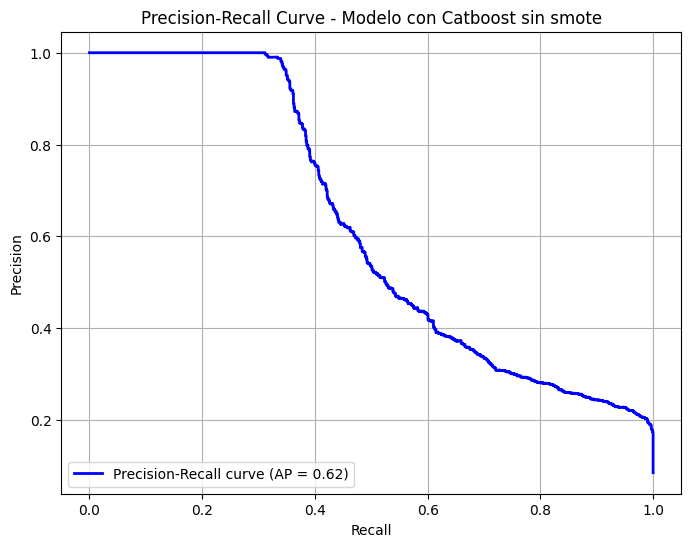

In [ ]:
from sklearn.metrics import log_loss,roc_curve,auc
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_recall_curve, average_precision_score

print("\nResultados del Modelo con Catboost sin smote en la data testing:")
y_pred_test_catboost = model.predict(X_test_catboost)
y_pred_proba_test_catboost = model.predict_proba(X_test_catboost)[:, 1]


# Cálculo de métricas
cm_catboost_test = confusion_matrix(y_test_catboost, y_pred_test_catboost)
sensitivity_catboost_test = recall_score(y_test_catboost, y_pred_test_catboost, pos_label='PROMOVIDO')
specificity_catboost_test = cm_catboost_test[0, 0] / sum(cm_catboost_test[0, :])
accuracy_catboost_test = accuracy_score(y_test_catboost, y_pred_test_catboost)
balanced_accuracy_catboost_test = (sensitivity_catboost_test + specificity_catboost_test) / 2
logloss_catboost_test = log_loss(y_test_catboost, y_pred_proba_test_catboost)


precision_catboost_test, recall_catboost_test, _ = precision_recall_curve(y_test_catboost, y_pred_proba_test_catboost, pos_label='PROMOVIDO')
average_precision_catboost_test = average_precision_score(y_test_catboost, y_pred_proba_test_catboost, pos_label='PROMOVIDO')

# Gráfico de la curva Precision-Recall para el Modelo con Catboost sin smote
plt.figure(figsize=(8, 6))
plt.plot(recall_catboost_test, precision_catboost_test, color='blue', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_catboost_test))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Modelo con Catboost sin smote')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [ ]:
# Mostrar métricas
print("\nResultados con catboost:")
print("Matriz de Confusión:\n", cm_catboost_test)
print(f"Sensibilidad: {sensitivity_catboost_test:.4f}")
print(f"Especificidad: {specificity_catboost_test:.4f}")
print(f"Accuracy: {accuracy_catboost_test:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_catboost_test:.4f}")
print(f"Log-Loss (test): {logloss_catboost_test:.4f}")
print(f"Average Precision (AP) (test): {average_precision_catboost_test:.4f}")


Resultados con catboost:
Matriz de Confusión:
 [[9999   29]
 [ 600  334]]
Sensibilidad: 0.3576
Especificidad: 0.9971
Accuracy: 0.9426
Balanced Accuracy: 0.6774
Log-Loss (test): 0.1611
Average Precision (AP) (test): 0.6191


### 6.2. Predicción del Modelo con Catboost-Grid sin smote en la data testing


Resultados del Modelo con Catboost-Grid sin smote en la data testing:


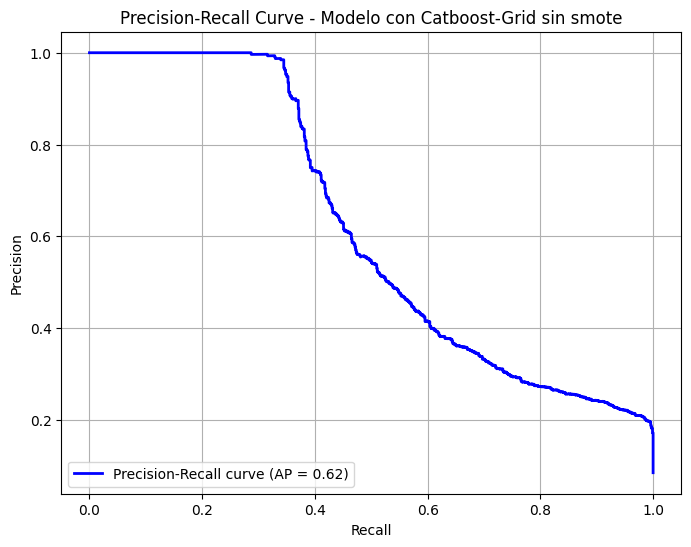

In [ ]:
from sklearn.metrics import log_loss,roc_curve,auc

print("\nResultados del Modelo con Catboost-Grid sin smote en la data testing:")
y_pred_test_catboost_grid = grid_search_catboost.predict(X_test_catboost)
y_pred_proba_test_catboost_grid = grid_search_catboost.predict_proba(X_test_catboost)[:, 1]


cm_catboost_test_grid = confusion_matrix(y_test_catboost, y_pred_test_catboost_grid)
sensitivity_catboost_test_grid = recall_score(y_test_catboost, y_pred_test_catboost_grid, pos_label='PROMOVIDO')
specificity_catboost_test_grid = cm_catboost_test_grid[0, 0] / sum(cm_catboost_test_grid[0, :])
accuracy_catboost_test_grid = accuracy_score(y_test_catboost, y_pred_test_catboost_grid)
balanced_accuracy_catboost_test_grid = (sensitivity_catboost_test_grid + specificity_catboost_test_grid) / 2
logloss_catboost_test_grid = log_loss(y_test_catboost, y_pred_proba_test_catboost_grid)

precision_catboost_test_grid, recall_catboost_test_grid, _ = precision_recall_curve(y_test_catboost, y_pred_proba_test_catboost_grid, pos_label='PROMOVIDO')
average_precision_catboost_test_grid = average_precision_score(y_test_catboost, y_pred_proba_test_catboost_grid, pos_label='PROMOVIDO')

# Gráfico de la curva Precision-Recall para el Modelo con Catboost sin smote
plt.figure(figsize=(8, 6))
plt.plot(recall_catboost_test_grid, precision_catboost_test_grid, color='blue', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_catboost_test_grid))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Modelo con Catboost-Grid sin smote')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [ ]:
# Mostrar métricas
print("\nResultados con catboost:")
print("Matriz de Confusión:\n", cm_catboost_test_grid)
print(f"Sensibilidad: {sensitivity_catboost_test_grid:.4f}")
print(f"Especificidad: {specificity_catboost_test_grid:.4f}")
print(f"Accuracy: {accuracy_catboost_test_grid:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_catboost_test_grid:.4f}")
print(f"Log-Loss (test): {logloss_catboost_test_grid:.4f}")
print(f"Average Precision (AP) (test): {average_precision_catboost_test_grid:.4f}")


Resultados con catboost:
Matriz de Confusión:
 [[9998   30]
 [ 604  330]]
Sensibilidad: 0.3533
Especificidad: 0.9970
Accuracy: 0.9422
Balanced Accuracy: 0.6752
Log-Loss (test): 0.1621
Average Precision (AP) (test): 0.6169


# *CON DUMIES*

## Selección de muestra de entrenamiento (80%) y de evaluación (20%)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Selección de muestra de entrenamiento (80%) y de evaluación (20%)
# Configuramos la semilla para la reproducibilidad
np.random.seed(2024)

# Dividimos el dataset en entrenamiento (80%) y evaluación (20%)
X = datos_transformado.drop(columns='is_promoted')
y = datos_transformado['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2024)

# Calculando las frecuencias y porcentajes de las clases en el dataset original
original_counts = y.value_counts()
original_percent = round(y.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de entrenamiento
train_counts = y_train.value_counts()
train_percent = round(y_train.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de prueba
test_counts = y_test.value_counts()
test_percent = round(y_test.value_counts(normalize=True) * 100, 2)

# Creando DataFrames para cada conjunto
original_df = pd.DataFrame({'Frecuencia': original_counts, 'Porcentaje (%)': original_percent})
train_df = pd.DataFrame({'Frecuencia': train_counts, 'Porcentaje (%)': train_percent})
test_df = pd.DataFrame({'Frecuencia': test_counts, 'Porcentaje (%)': test_percent})

# Aplicando estilo visual a cada cuadro
def estilizar_tabla(df, titulo):
    return (df.style.set_caption(titulo)
                 .format({'Porcentaje (%)': '{:.2f}%'})
                 .set_properties(**{'text-align': 'center'})
                 .set_table_styles([{
                     'selector': 'th',
                     'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                               ('background-color', '#4CAF50')]
                 }, {
                     'selector': 'td',
                     'props': [('font-size', '12px')]
                 }]))

In [ ]:
estilizar_tabla(original_df, "Distribución de Clases en el Dataset Original")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,50140,91.48%
PROMOVIDO,4668,8.52%


In [ ]:
estilizar_tabla(train_df, "Distribución de Clases en el Conjunto de Entrenamiento")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,40112,91.48%
PROMOVIDO,3734,8.52%


In [ ]:
estilizar_tabla(test_df, "Distribución de Clases en el Conjunto de Prueba")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,10028,91.48%
PROMOVIDO,934,8.52%


## 4. Balanceo

### Balanceo con Borderline-SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

# Configuración de Borderline-SMOTE
borderline_smote_catboost = BorderlineSMOTE(sampling_strategy=0.45, random_state=2024, kind='borderline-1')

# Aplicar Borderline-SMOTE al conjunto de datos de entrenamiento
X_train_border_catboost, y_train_border_catboost = borderline_smote_catboost.fit_resample(X_train, y_train)

# Calculando las frecuencias y porcentajes de las clases después de aplicar Borderline-SMOTE
border_counts = y_train_border_catboost.value_counts()
border_percent = round(y_train_border_catboost.value_counts(normalize=True) * 100, 2)

# Creando un DataFrame para la distribución de clases después de Borderline-SMOTE
borderline_df = pd.DataFrame({'Frecuencia': border_counts, 'Porcentaje (%)': border_percent})

# Aplicando estilo visual al cuadro
def estilizar_tabla(df, titulo):
    return (df.style.set_caption(titulo)
                 .format({'Porcentaje (%)': '{:.2f}%'})
                 .set_properties(**{'text-align': 'center'})
                 .set_table_styles([{
                     'selector': 'th',
                     'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                               ('background-color', '#4CAF50')]
                 }, {
                     'selector': 'td',
                     'props': [('font-size', '12px')]
                 }]))

# Mostrar el cuadro estilizado
estilizar_tabla(borderline_df, "Distribución de Clases después de aplicar Borderline-SMOTE")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,40112,68.97%
PROMOVIDO,18050,31.03%


## 5. Modelado

### 5.3. Modelo con Catboost con smote

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Inicializar el modelo con algunos hiperparámetros
model_catboost_border = CatBoostClassifier(iterations=1000,
                           learning_rate=0.1,
                           depth=6,
                           verbose=100)

# Entrenar el modelo
model_catboost_border.fit(X_train_border_catboost , y_train_border_catboost )

0:	learn: 0.6054470	total: 11.5ms	remaining: 11.5s
100:	learn: 0.1952230	total: 822ms	remaining: 7.32s
200:	learn: 0.1496653	total: 1.62s	remaining: 6.43s
300:	learn: 0.1354223	total: 2.41s	remaining: 5.6s
400:	learn: 0.1273853	total: 3.23s	remaining: 4.82s
500:	learn: 0.1228329	total: 4.04s	remaining: 4.03s
600:	learn: 0.1188157	total: 4.87s	remaining: 3.23s
700:	learn: 0.1153812	total: 5.68s	remaining: 2.42s
800:	learn: 0.1124229	total: 6.53s	remaining: 1.62s
900:	learn: 0.1098857	total: 7.38s	remaining: 811ms
999:	learn: 0.1074946	total: 8.22s	remaining: 0us


In [ ]:
# Predecir en el conjunto de train
y_pred_train_border_catboost  = model_catboost_border.predict(X_train_border_catboost)

cm_border_catboost_train = confusion_matrix(y_train_border_catboost, y_pred_train_border_catboost)

# Cálculo de métricas
sensitivity_border_catboost_train = recall_score(y_train_border_catboost, y_pred_train_border_catboost, pos_label='PROMOVIDO')
specificity_border_catboost_train = cm_border_catboost_train[0, 0] / sum(cm_border_catboost_train[0, :])
accuracy_border_catboost_train = accuracy_score(y_train_border_catboost, y_pred_train_border_catboost)
balanced_accuracy_border_catboost_train = (sensitivity_border_catboost_train + specificity_border_catboost_train) / 2

# Crear un DataFrame para organizar los resultados de las métricas
resultados = pd.DataFrame({
    "Métrica": ["Sensibilidad", "Especificidad", "Accuracy", "Balanced Accuracy"],
    "Valor": [sensitivity_border_catboost_train, specificity_border_catboost_train, accuracy_border_catboost_train, balanced_accuracy_border_catboost_train]
})

# Configurar el índice para una presentación más clara
resultados.set_index("Métrica", inplace=True)

# Crear un DataFrame para la matriz de confusión
cm_df = pd.DataFrame(cm_border_catboost_train,
                     index=["NO_PROMOVIDO (Real)", "PROMOVIDO (Real)"],
                     columns=["NO_PROMOVIDO (Pred)", "PROMOVIDO (Pred)"])

# Mostrar los resultados
print("\nResultados con Catboost con smote:")
print(resultados)
print("\nMatriz de Confusión:")
print(cm_df)


Resultados con Catboost con smote:
                      Valor
Métrica                    
Sensibilidad       0.872244
Especificidad      0.998604
Accuracy           0.959389
Balanced Accuracy  0.935424

Matriz de Confusión:
                     NO_PROMOVIDO (Pred)  PROMOVIDO (Pred)
NO_PROMOVIDO (Real)                40056                56
PROMOVIDO (Real)                    2306             15744


### 5.6. Modelo con Catboost gritseach

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
model_catboost_grid_sm = CatBoostClassifier(verbose=0)

# Definir los hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

In [ ]:
recall_scorer = make_scorer(recall_score, pos_label='PROMOVIDO')

grid_search_catboost_sm = GridSearchCV(estimator=model_catboost_grid_sm,
                           param_grid=param_grid,
                           scoring=recall_scorer,
                           cv=5,  # Puedes ajustar el número de folds
                           verbose=2,
                           n_jobs=4)

grid_search_catboost_sm.fit(X_train_border_catboost , y_train_border_catboost)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x79a77054f1c0>,
             n_jobs=4,
             param_grid={'depth': [4, 6, 8], 'iterations': [500, 1000],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=PROMOVIDO),
             verbose=2)

In [ ]:
grid_search_catboost_sm.best_params_

{'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

In [ ]:
# Predecir en el conjunto de train
y_pred_train_border_catboost_sm_grit  = grid_search_catboost_sm.predict(X_train_border_catboost)

cm_border_catboost_train_sm_grit = confusion_matrix(y_train_border_catboost, y_pred_train_border_catboost_sm_grit)

# Cálculo de métricas
sensitivity_border_catboost_train_sm_grit = recall_score(y_train_border_catboost, y_pred_train_border_catboost_sm_grit, pos_label='PROMOVIDO')
specificity_border_catboost_train_sm_grit = cm_border_catboost_train_sm_grit[0, 0] / sum(cm_border_catboost_train_sm_grit[0, :])
accuracy_border_catboost_train_sm_grit = accuracy_score(y_train_border_catboost, y_pred_train_border_catboost_sm_grit)
balanced_accuracy_border_catboost_train_sm_grit = (sensitivity_border_catboost_train_sm_grit + specificity_border_catboost_train_sm_grit) / 2

# Crear un DataFrame para organizar los resultados de las métricas
resultados = pd.DataFrame({
    "Métrica": ["Sensibilidad", "Especificidad", "Accuracy", "Balanced Accuracy"],
    "Valor": [sensitivity_border_catboost_train_sm_grit, specificity_border_catboost_train_sm_grit, accuracy_border_catboost_train_sm_grit, balanced_accuracy_border_catboost_train_sm_grit]
})

# Configurar el índice para una presentación más clara
resultados.set_index("Métrica", inplace=True)

# Crear un DataFrame para la matriz de confusión
cm_df = pd.DataFrame(cm_border_catboost_train_sm_grit,
                     index=["NO_PROMOVIDO (Real)", "PROMOVIDO (Real)"],
                     columns=["NO_PROMOVIDO (Pred)", "PROMOVIDO (Pred)"])

# Mostrar los resultados
print("\nResultados con Catboost-Grid con smote:")
print(resultados)
print("\nMatriz de Confusión:")
print(cm_df)


Resultados con Catboost-Grid con smote:
                      Valor
Métrica                    
Sensibilidad       0.886925
Especificidad      0.998604
Accuracy           0.963946
Balanced Accuracy  0.942765

Matriz de Confusión:
                     NO_PROMOVIDO (Pred)  PROMOVIDO (Pred)
NO_PROMOVIDO (Real)                40056                56
PROMOVIDO (Real)                    2041             16009


## 6. Predicción de los modelos en la data testing

### 6.3. Predicción del Modelo con Catboost con smote en la data testing


Resultados del Modelo con Catboost con smote en la data testing:


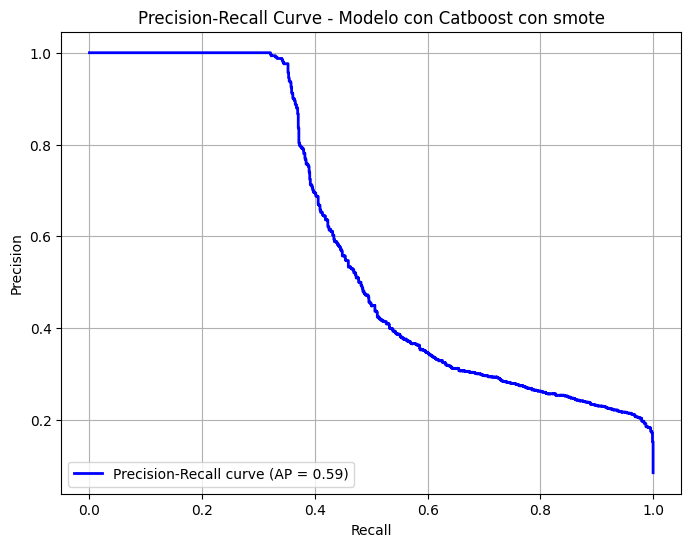

In [ ]:
from sklearn.metrics import log_loss,roc_curve,auc

print("\nResultados del Modelo con Catboost con smote en la data testing:")
y_pred_test_catboost_sm = model_catboost_border.predict(X_test)
y_pred_proba_test_catboost_sm = model_catboost_border.predict_proba(X_test)[:, 1]


# Cálculo de métricas
cm_catboost_test_sm = confusion_matrix(y_test, y_pred_test_catboost_sm)
sensitivity_catboost_test_sm = recall_score(y_test, y_pred_test_catboost_sm, pos_label='PROMOVIDO')
specificity_catboost_test_sm = cm_catboost_test_sm[0, 0] / sum(cm_catboost_test_sm[0, :])
accuracy_catboost_test_sm = accuracy_score(y_test, y_pred_test_catboost_sm)
balanced_accuracy_catboost_test_sm = (sensitivity_catboost_test_sm + specificity_catboost_test_sm) / 2
logloss_catboost_test_sm = log_loss(y_test, y_pred_proba_test_catboost_sm)

precision_catboost_test_sm, recall_catboost_test_sm, _ = precision_recall_curve(y_test, y_pred_proba_test_catboost_sm, pos_label='PROMOVIDO')
average_precision_catboost_test_sm = average_precision_score(y_test, y_pred_proba_test_catboost_sm, pos_label='PROMOVIDO')

# Gráfico de la curva Precision-Recall para el Modelo con Catboost sin smote
plt.figure(figsize=(8, 6))
plt.plot(recall_catboost_test_sm, precision_catboost_test_sm, color='blue', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_catboost_test_sm))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Modelo con Catboost con smote')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [ ]:
# Mostrar métricas
print("Matriz de Confusión:\n", cm_catboost_test_sm)
print(f"Sensibilidad (test): {sensitivity_catboost_test_sm:.4f}")
print(f"Especificidad (test): {specificity_catboost_test_sm:.4f}")
print(f"Accuracy (test): {accuracy_catboost_test_sm:.4f}")
print(f"Balanced Accuracy (test): {balanced_accuracy_catboost_test_sm:.4f}")
print(f"Log-Loss (test): {logloss_catboost_test_sm:.4f}")
print(f"Average Precision (AP) (test): {average_precision_catboost_test_sm:.4f}")

Matriz de Confusión:
 [[9986   42]
 [ 593  341]]
Sensibilidad (test): 0.3651
Especificidad (test): 0.9958
Accuracy (test): 0.9421
Balanced Accuracy (test): 0.6805
Log-Loss (test): 0.1687
Average Precision (AP) (test): 0.5921


### 6.3. Predicción del Modelo con Catboost con smote y grid en la data testing


Resultados del Modelo con Catboost-Grid con smote grid  en la data testing:


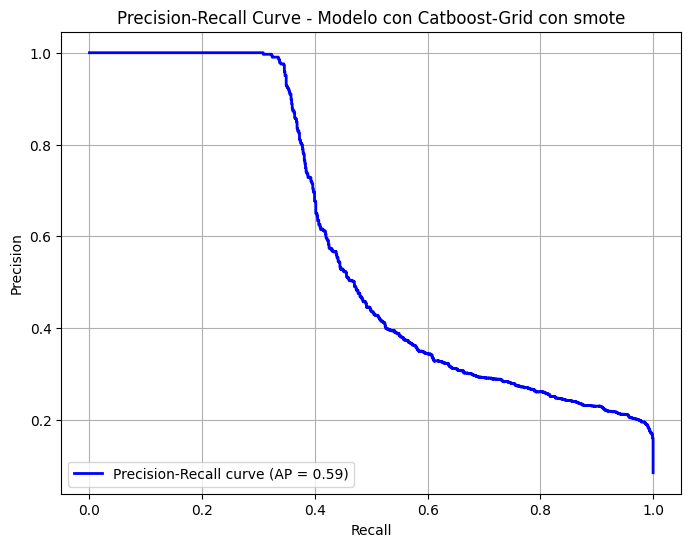

In [ ]:
from sklearn.metrics import log_loss,roc_curve,auc

print("\nResultados del Modelo con Catboost-Grid con smote grid  en la data testing:")
y_pred_test_catboost_sm_grit = grid_search_catboost_sm.predict(X_test)
y_pred_proba_test_catboost_sm_grit = grid_search_catboost_sm.predict_proba(X_test)[:, 1]


# Cálculo de métricas
cm_catboost_test_sm_grit = confusion_matrix(y_test, y_pred_test_catboost_sm_grit)
sensitivity_catboost_test_sm_grit = recall_score(y_test, y_pred_test_catboost_sm_grit, pos_label='PROMOVIDO')
specificity_catboost_test_sm_grit = cm_catboost_test_sm_grit[0, 0] / sum(cm_catboost_test_sm_grit[0, :])
accuracy_catboost_test_sm_grit = accuracy_score(y_test, y_pred_test_catboost_sm_grit)
balanced_accuracy_catboost_test_sm_grit = (sensitivity_catboost_test_sm_grit + specificity_catboost_test_sm_grit) / 2
logloss_catboost_test_sm_grit = log_loss(y_test, y_pred_proba_test_catboost_sm_grit)

precision_catboost_test_sm_grit, recall_catboost_test_sm_grit, _ = precision_recall_curve(y_test, y_pred_proba_test_catboost_sm_grit, pos_label='PROMOVIDO')
average_precision_catboost_test_sm_grit = average_precision_score(y_test, y_pred_proba_test_catboost_sm_grit, pos_label='PROMOVIDO')

# Gráfico de la curva Precision-Recall para el Modelo con Catboost sin smote
plt.figure(figsize=(8, 6))
plt.plot(recall_catboost_test_sm_grit, precision_catboost_test_sm_grit, color='blue', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_catboost_test_sm_grit))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Modelo con Catboost-Grid con smote')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [ ]:
# Mostrar métricas
print("Matriz de Confusión:\n", cm_catboost_test_sm_grit)
print(f"Sensibilidad (test): {sensitivity_catboost_test_sm_grit:.4f}")
print(f"Especificidad (test): {specificity_catboost_test_sm_grit:.4f}")
print(f"Accuracy (test): {accuracy_catboost_test_sm_grit:.4f}")
print(f"Balanced Accuracy (test): {balanced_accuracy_catboost_test_sm_grit:.4f}")
print(f"Log-Loss (test): {logloss_catboost_test_sm_grit:.4f}")
print(f"Average Precision (AP) (test): {average_precision_catboost_test_sm_grit:.4f}")

Matriz de Confusión:
 [[9957   71]
 [ 588  346]]
Sensibilidad (test): 0.3704
Especificidad (test): 0.9929
Accuracy (test): 0.9399
Balanced Accuracy (test): 0.6817
Log-Loss (test): 0.1739
Average Precision (AP) (test): 0.5863


## 7. Comparación de las evaluación de los modelos

### TRAIN

In [ ]:
# Crear un DataFrame para comparar los resultados de cada modelo
comparacion_resultados = pd.DataFrame({
    "Modelo": ["Catboost sin smote", "Catboost-Grid sin smote","Catboost con smote","Catboost-Grid con smote"],
    "Sensibilidad (train)": [sensitivity_catboost_train, sensitivity_catboost_train_grid,sensitivity_border_catboost_train,sensitivity_border_catboost_train_sm_grit],
    "Especificidad (train)": [specificity_catboost_train, specificity_catboost_train_grid,specificity_border_catboost_train,specificity_border_catboost_train_sm_grit],
    "Accuracy (train)": [accuracy_catboost_train, accuracy_catboost_train_grid,accuracy_border_catboost_train,accuracy_border_catboost_train_sm_grit],
    "Balanced Accuracy (train)": [balanced_accuracy_catboost_train, balanced_accuracy_catboost_train_grid,balanced_accuracy_border_catboost_train,balanced_accuracy_border_catboost_train_sm_grit]
})

# Configurar el índice para mejorar la presentación
comparacion_resultados.set_index("Modelo", inplace=True)

# Mostrar la tabla comparativa
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', None)       # Muestra todas las filas
print("\nComparación de Indicadores entre Modelos:")
print(comparacion_resultados)


Comparación de Indicadores entre Modelos:
                         Sensibilidad (train)  Especificidad (train)  \
Modelo                                                                 
Catboost sin smote                   0.392876               0.999302   
Catboost-Grid sin smote              0.402785               0.999352   
Catboost con smote                   0.872244               0.998604   
Catboost-Grid con smote              0.886925               0.998604   

                         Accuracy (train)  Balanced Accuracy (train)  
Modelo                                                                
Catboost sin smote               0.947658                   0.696089  
Catboost-Grid sin smote          0.948547                   0.701069  
Catboost con smote               0.959389                   0.935424  
Catboost-Grid con smote          0.963946                   0.942765  


### TEST

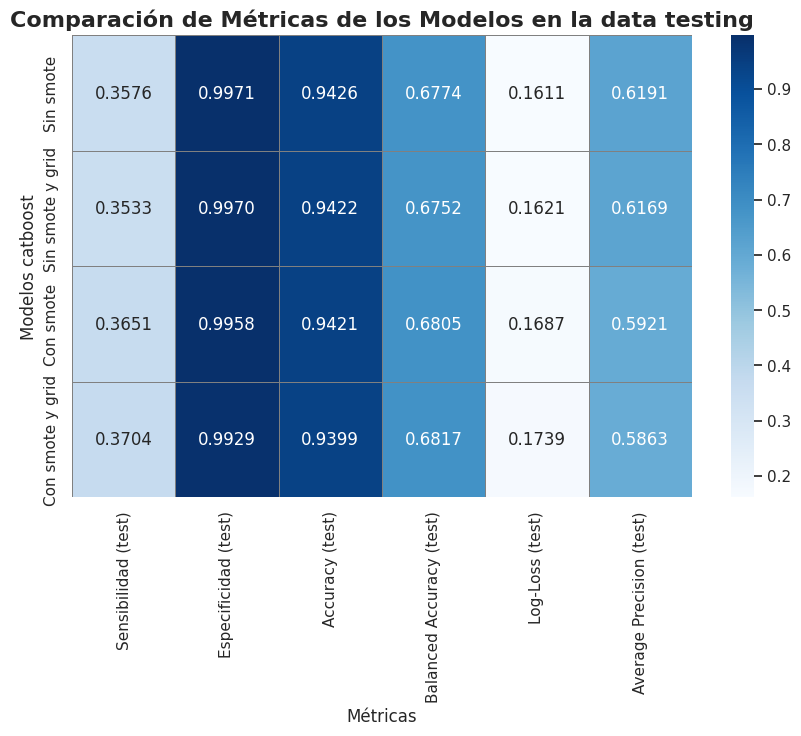

In [ ]:
# Crear un diccionario con los resultados de cada modelo
results = {
    'Modelo': ['Sin smote', 'Sin smote y grid', 'Con smote', 'Con smote y grid'],
    'Sensibilidad (test)': [sensitivity_catboost_test, sensitivity_catboost_test_grid, sensitivity_catboost_test_sm, sensitivity_catboost_test_sm_grit],
    'Especificidad (test)': [specificity_catboost_test, specificity_catboost_test_grid, specificity_catboost_test_sm, specificity_catboost_test_sm_grit],
    'Accuracy (test)': [accuracy_catboost_test, accuracy_catboost_test_grid, accuracy_catboost_test_sm, accuracy_catboost_test_sm_grit],
    'Balanced Accuracy (test)': [balanced_accuracy_catboost_test, balanced_accuracy_catboost_test_grid, balanced_accuracy_catboost_test_sm, balanced_accuracy_catboost_test_sm_grit],
    'Log-Loss (test)': [logloss_catboost_test, logloss_catboost_test_grid, logloss_catboost_test_sm, logloss_catboost_test_sm_grit],
    'Average Precision (test)': [average_precision_catboost_test, average_precision_catboost_test_grid, average_precision_catboost_test_sm, average_precision_catboost_test_sm_grit]
}

# Crear un DataFrame de pandas
results_df = pd.DataFrame(results)

# Configuración para la visualización
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Crear la tabla con seaborn
table = sns.heatmap(results_df.set_index('Modelo'), annot=True, fmt=".4f", cmap='Blues', cbar=True, linewidths=.5, linecolor='gray')

# Personalización de la tabla
table.set_title('Comparación de Métricas de los Modelos en la data testing', fontweight='bold', fontsize=16)
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Modelos catboost', fontsize=12)

# Mostrar la tabla
plt.show()

- Gracias al hacer la comparación con las metricas vemos un mejor desempeño con el modelo de Regresión logistica tanto en sus Accuracy y el Balanced Accuracy, si bien en el modelo K-NN tiene un mayor porcentaje en el Accuracy la decición clave esta en el Log-Loss ya que en el modelo de K-NN es muy alto. Por lo tanto usaremos el modelo de Regresión logistica.